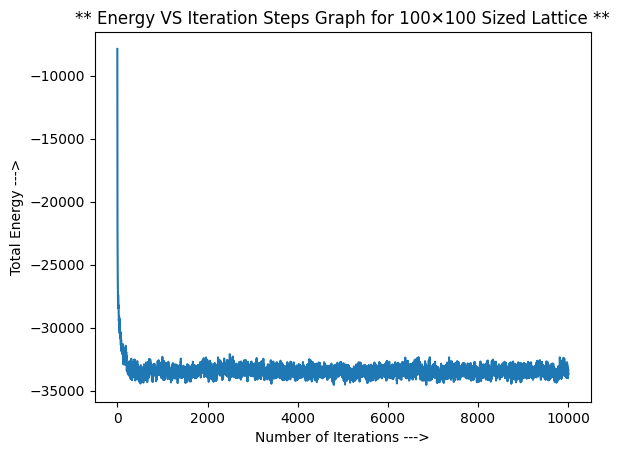

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import matplotlib.pyplot as plt
import math

## Taking the parameters ##
L=100
N=L*L # Box size is taken as L by L where L is equal to 100
J=1 # Coupling constant taken unity
K=1 # Boltzman constant taken unity
T=2 # Random temperature taken
total_iterations=10000

## Implementation of periodic boundary condition for square lattice ##
index=[i for i in range(N)]
a=[]  # Now we'll make a dictionary so that the key represents a lattice site & the key maps to four neighbours of that site
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a)) # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

spins=[random.randint(-1,1) for s in range(N)] # Total N number of spins are chosen randomly with spins 0 and -1
for i in range(N):
    if spins[i]==0:
        spins[i]=1 # N spins have spin-values as 1 and -1

energy=[]
iterative_steps=[i for i in range(total_iterations+1)] # List containing the iteration orders one by one
for i in range(total_iterations+1):
    E=0
    for k in range(N):
        j=random.randint(0,N)
        E_j=(-1)*J*(spins[j])*((spins[D[j][0]])+(spins[D[j][1]])+(spins[D[j][2]])+(spins[D[j][3]])) # Energy of jth site spin
        E=E+E_j # This 'E' will contain the total energy of the system before each iteration
        # Now randomly spin flip is carried out and acceptance is registered according to Metropolis Algorithm
        DelE=2*J*(spins[j])*((spins[D[j][0]])+(spins[D[j][1]])+(spins[D[j][2]])+(spins[D[j][3]]))
        if DelE<=0:
            spins[j]=-spins[j]
        elif random.random_sample()<math.exp(J*(-DelE)/(K*T)): # METROPOLIS ALGORITHM
            spins[j]=-spins[j]
    energy.append(E)

## Energy VS Iteration Steps graph ##
plt.plot(iterative_steps,energy)
plt.xlabel("Number of Iterations --->")
plt.ylabel('Total Energy --->')
plt.title("** Energy VS Iteration Steps Graph for 100✕100 Sized Lattice **")
plt.show()

From the above graph we can conclude that the *lattice of size 100✕100 takes approximately 2000 iterations to reach equilbrium* from any initial configuration.

Here we have plotted ENERGY VS ITERATION graph and we see that **energy is MINIMIZED after 2000 iterations which implies that the system has reached EQUILIBRIUM**.

For lattice of any size (less than 100✕100) we can safely use the number of iterations as 2000 to equilibriate the system.

Now we shall plot Order parameter VS Temperature for three different system sizes.
First we store the magnetisation values at different temperatures for 4✕4 lattice.

In [5]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=4
N=L*L # Now the system size is 4✕4
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000, average over 10000 ensembles

## Implementation of periodic boundary condition for square lattice
# The 2-D square lattice is mapped onto a linear lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
average_magnetisation1=[] # This will store the average values of magnetisation at different temperature for 4✕4 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        # Now Monte-Carlo Algorithm implementation
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            # Metroplis Algorithm
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
    M1=m1/steps
    average_magnetisation1.append(M1) # Calculating average magnetisation for 4✕4 square lattice
## average_magnetisation1 is the list containing the average magnetisation values at different temperature values 4✕4 lattice ##

In [6]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=8
N=L*L # Now the system size is 8✕8
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000, average over 10000 ensembles

## Implementation of periodic boundary condition for square lattice
# The 2-D square lattice is mapped onto a linear lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
average_magnetisation2=[] # This will store the average values of magnetisation at different temperature for 8✕8 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        # Monte Carlo Algorithm
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
    M1=m1/steps
    average_magnetisation2.append(M1) # Calculating average magnetisation for 8✕8 square lattice

## average_magnetisation2 is the list containing the average magnetisation values at different temperature values 8✕8 lattice ##

In [7]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=12
N=L*L # Now the system size is 12✕12
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000, average over 10000 ensembles

## Implementation of periodic boundary condition for square lattice
# The 2-D square lattice is mapped onto a linear lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
average_magnetisation3=[] # This will store the average values of magnetisation at different temperature for 12✕12 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        # Monte Carlo Algorithm
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
    M1=m1/steps
    average_magnetisation3.append(M1) # Calculating average magnetisation for 8✕8 square lattice
## average_magnetisation3 is the list containing the average magnetisation (ensemble average) values at different temperature values 12✕12 lattice ##

Order Parameter is normalised magnetisation, order parameter is the magnetisation (avderage magnetisation) divided by total number of spins

In [8]:
order_parameter1=[i/16 for i in average_magnetisation1] # Order parameter for 4✕4 Lattice
order_parameter2=[i/64 for i in average_magnetisation2] # Order parameter for 8✕8 Lattice
order_parameter3=[i/144 for i in average_magnetisation3] # Order parameter for 12✕12 Lattice

Now plotting of order parameter versus temperature graph for different system sizes

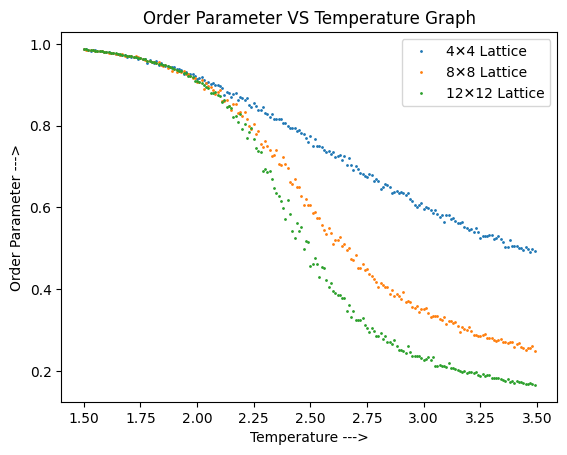

In [11]:
import matplotlib.pyplot as plt
plt.plot(temp,order_parameter1,'.',label='4✕4 Lattice',ms=2)
plt.plot(temp,order_parameter2,'.',label='8✕8 Lattice',ms=2)
plt.plot(temp,order_parameter3,'.',label='12✕12 Lattice',ms=2)
plt.legend()
plt.xlabel('Temperature --->')
plt.ylabel('Order Parameter --->')
plt.title('Order Parameter VS Temperature Graph')
plt.show()

We see that as the system size increases more the more drastic change of order parameter takes place.

We want to find the critical temperature, the temperature at which the order parameter is expected to drop abruptly in the thermodynamic limit i.e. in the case of infinite system size.

The below cell stores the binder cumulant values (ensemble average) for 4✕4 square lattice.

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=4
N=L*L # Now the system size is 4✕4
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=100000 # Number of microscopic configurations taken is 100000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins)))
    return m11

temp=[] # This will store the values of different temperatures
binder0=[] # This will store the values of binder cumulant at different temperature for 4✕4 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N): # Monte Carlo algorithm
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m*m # Sum of square of magnetisation for every microscopic configuration
        m2=m2+m**4 # Sum of magnetisation^4 for each of the microscopic configurations
    M2,M1=m2/steps,m1*m1/(steps**2)
    binder0.append(1-(M2/(3*M1))) # Calculating Binder-Cumulant for 4✕4 square lattice

## binder0 is the list containing the Binder Cumulant values at different temperature values for 4✕4 square lattice ##

The below cell stores the binder cumulant values (ensemble average) for 8✕8 square lattice.

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=8
N=L*L # Now the system size is 8✕8
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=100000 # Number of microscopic configurations taken is 100000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins)))
    return m11

temp=[] # This will store the values of different temperatures
binder1=[] # This will store the values of binder cumulant at different temperature for 8✕8 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m*m # Sum of square of magnetisation for every microscopic configuration
        m2=m2+m**4 # Sum of magnetisation^4 for each of the microscopic configurations
    M2,M1=m2/steps,m1*m1/(steps**2)
    binder1.append(1-(M2/(3*M1))) # Calculating Binder-Cumulant for 8✕8 square lattice

## binder1 is the list containing the Binder Cumulant values at different temperature values for 8✕8 square lattice ##

The below cell stores the binder cumulant values (ensemble average) for 12✕12 square lattice.

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=12
N=L*L # Now the system size is 12✕12
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=100000 # Number of microscopic configurations taken is 100000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins)))
    return m11

temp=[] # This will store the values of different temperatures
binder2=[] # This will store the values of binder cumulant at different temperature for 12✕12 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m*m # Sum of square of magnetisation for every microscopic configuration
        m2=m2+m**4 # Sum of magnetisation^4 for each of the microscopic configurations
    M2,M1=m2/steps,m1*m1/(steps**2)
    binder2.append(1-(M2/(3*M1))) # Calculating Binder-Cumulant for 12✕12 square lattice

## binder2 is the list containing the Binder Cumulant values at different temperature values for 12✕12 square lattice ##

From running the above three cells we got the three sets, each of the sets contains Binder Cumulant values at different temperatures.

Now we have three sets of Binder Cumulant values for temperature range [1.5, 3.5]. One set is for 4✕4 lattice and another are for 8✕8 and 12✕12 lattices. We can plot the three graphs and find the common intersection point.

*The Binder Cumulant VS Temperature graphs for different lattice sizes intersect at a common point whose **abscissa** is the critical temperature!*

The x-coordinate of the intersecting point will be the **critical temperature** at which *phase transition* occurs.

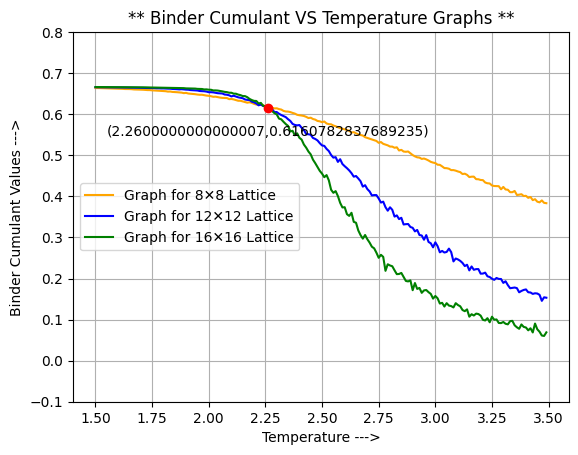

The critical temperature is 2.2600000000000007


In [ ]:
## Importing libraries ##
import matplotlib.pyplot as plt
import numpy
from shapely.geometry import LineString

## Here we shall mark the intersecting point(s) and find the values of x-coordinates ##
binder1=numpy.array(binder1)
binder0=numpy.array(binder0)
binder2=numpy.array(binder2)
goltu=numpy.argwhere(numpy.diff(numpy.sign(binder1-binder2))).flatten()
# Now we shall plot three graphs for three different lattices
plt.plot(temp,binder0,c='orange',label='Graph for 4✕4 Lattice')
plt.plot(temp,binder1,c='blue',label='Graph for 8✕8 Lattice')
plt.plot(temp,binder2,c='green',label='Graph for 12✕12 Lattice')
plt.plot(temp[goltu[len(goltu)-1]],binder1[goltu[len(goltu)-1]],'ro') # Showing the point of intersection as red dot
plt.annotate('(%s,%s)'%(temp[goltu[len(goltu)-1]],binder1[goltu[len(goltu)-1]]),xy=(temp[goltu[len(goltu)-1]],binder1[goltu[len(goltu)-1]])
,textcoords='offset points',xytext=(0,-20),ha='center') # Marking the point of intersection
plt.ylim(-0.1,0.8)
plt.legend(loc='center left')
plt.grid(True)
plt.xlabel('Temperature --->')
plt.ylabel("Binder Cumulant Values --->")
plt.title("** Binder Cumulant VS Temperature Graphs **")
plt.show()
print("The critical temperature is",temp[goltu[0]]) # The value of critical temperature

**The critical temperature is coming as 2.2600000000000007.** However the actual accepted value is 2.269, we have averaged over 100000 steps, increasing the number of steps or number of ensembles will cause the obtained value to approach the accepted value.

**Binder Cumulant Graph Collapsing.**

We have to use scaling law to obtain the collapsing. Here ε is (T-Tc)/T where T is the temperature in absolute scale and Tc is the critical temperature in absolute scale.

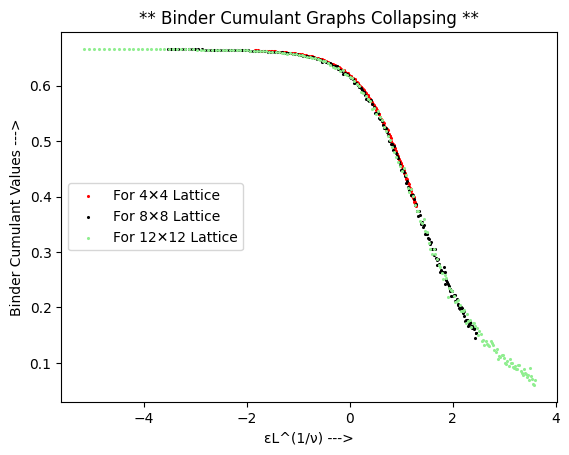

In [ ]:
Tc=2.2600000000000007 # Critical temperature
epcylon=[(T-Tc)/T for T in temp]
nu=1.01
# nu is critical exponent
L1,L2,L3=4,8,12

# Scaling
X_coord1=[epcylon[i]*(L1**(1/nu)) for i in range(len(temp))]
X_coord2=[epcylon[i]*(L2**(1/nu)) for i in range(len(temp))]
X_coord3=[epcylon[i]*(L3**(1/nu)) for i in range(len(temp))]
# Plotting
import matplotlib.pyplot as plt

# The previously known binder cumulant values are used
plt.scatter(X_coord1,binder0,s=1.5,c='red',label='For 4✕4 Lattice')
plt.scatter(X_coord2,binder1,s=1.5,c='black',label='For 8✕8 Lattice')
plt.scatter(X_coord3,binder2,s=1.5,c='lightgreen',label='For 12✕12 Lattice')
plt.legend(loc='center left')
plt.xlabel('εL^(1/ν) --->')
plt.ylabel("Binder Cumulant Values --->")
plt.title("** Binder Cumulant Graphs Collapsing **")
plt.show()

ν (nu) is a critical exponent. For 2-D ising model its accepted value is 1.
We have obtained nice collapsing using ν = 1.01

In [12]:
# After obtaining ν (nu) value we want to find the critical exponent β value for 2-D ising model.
# Here the graph collapsing will be done for ΦL^(β/ν) VS εL^(1/ν) graphs
# Φ is order parameter and L is length of square lattice side

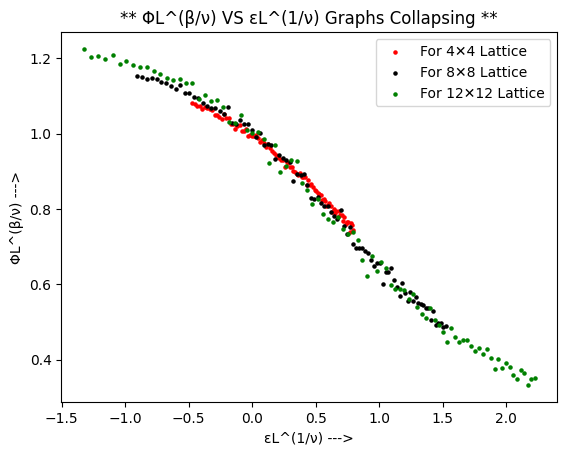

In [ ]:
import math
import matplotlib.pyplot as plt

Tc=2.2600000000000007 # Critical temperature
temp_series=[x for x in temp[50:140]]  # Cutting the temperature window about Tc for better result
epcylon=[(T-Tc)/T for T in temp_series]
beta,nu=0.125,1.01
L1,L2,L3=4,8,12
X_coord1=[epcylon[i]*(L1**(1/nu)) for i in range(len(temp_series))]
X_coord2=[epcylon[i]*(L2**(1/nu)) for i in range(len(temp_series))]
X_coord3=[epcylon[i]*(L3**(1/nu)) for i in range(len(temp_series))]
# The previously found order parameter values are taken
Order_parameter1=[i for i in order_parameter1[50:140]]
Order_parameter2=[i for i in order_parameter2[50:140]]
Order_parameter3=[i for i in order_parameter3[50:140]]
Y_coord1=[i*(4**(beta/nu)) for i in Order_parameter1]
Y_coord2=[i*(8**(beta/nu)) for i in Order_parameter2]
Y_coord3=[i*(12**(beta/nu)) for i in Order_parameter3]

plt.scatter(X_coord1,Y_coord1,s=5,c='red',label='For 4✕4 Lattice')
plt.scatter(X_coord2,Y_coord2,s=5,c='black',label='For 8✕8 Lattice')
plt.scatter(X_coord3,Y_coord3,s=5,c='green',label='For 12✕12 Lattice')
plt.legend()
plt.xlabel('εL^(1/ν) --->')
plt.ylabel("ΦL^(β/ν) --->")
plt.title("** ΦL^(β/ν) VS εL^(1/ν) Graphs Collapsing **")
plt.show()

From the above graph and code we see that **the β value is coming as 0.125** which matches with the theoretically accepted value.

Now we shall draw the susceptibility versus temperature graph, this graph will have a maximum at a particular temperature (critical temperature). Ideally *in thermodynamic limit the susceptibility should diverge to infinity at critical temperature*.

In [13]:
# Finding susceptibility for three different sized lattices
# The three below cells will store the values of susceptibility for 4✕4, 8✕8 & 12✕12 lkattices

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=4
N=L*L # Now the system size is 8✕8
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
susceptibility1=[] # This will store the susceptibility values at different temperature for 8✕8 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
        m2=m2+m*m # Sum of square of magnetisation for each of the microscopic configurations
    M2=m2/(steps*N)
    M1=(m1**2)/(steps*steps*N)
    Chi=(M2-M1)/T
    susceptibility1.append(Chi) # Calculating susceptibility for 4✕4 square lattice
## susceptibility1 is the list containing the susceptibility values at different temperature values for 4✕4 square lattice ##

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=8
N=L*L # Now the system size is 8✕8
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
susceptibility2=[] # This will store the susceptibility values at different temperature for 8✕8 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
        m2=m2+m*m # Sum of square of magnetisation for each of the microscopic configurations
    M2=m2/(steps*N)
    M1=(m1**2)/(steps*steps*N)
    Chi=(M2-M1)/T
    susceptibility2.append(Chi) # Calculating susceptibility for 8✕8 square lattice
## susceptibility2 is the list containing the susceptibility values at different temperature values for 8✕8 square lattice ##

In [ ]:
## Importing necessary libraries ##
import numpy
from numpy import random
import math

## Input the parameters like before ##
L=12
N=L*L # Now the system size is 12✕12
J=1
K=1
steps_to_equiibriate=2000 # As obtained from the previous result the steps needed for equilibriation is taken 2000
steps=10000 # Number of microscopic configurations taken is 10000

## Implementation of periodic boundary condition for square lattice
index=[i for i in range(N)]
a=[]
for i in range(N):
    if (1<=i//L<=L-2) and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,i-L])
    if i//L==0 and i%L==0:
        a.append([1,L,L-1,L*(L-1)])
    if i//L==0 and i%L==L-1:
        a.append([0,L+L-1,i-1,L*L-1])
    if i//L==L-1 and i%L==0:
        a.append([i+1,0,L*L-1,i-L])
    if i//L==L-1 and i%L==L-1:
        a.append([L*(L-1),L-1,i-1,i-L])
    if i//L==0 and (1<=i%L<=L-2):
        a.append([i+1,i+L,i-1,L*(L-1)+(i%L)])
    if i//L==L-1 and (1<=i%L<=L-2):
        a.append([i+1,(i%L),i-1,i-L])
    if (1<=i//L<=L-2) and i%L==0:
        a.append([i+1,i+L,L*(i//L)+L-1,i-L])
    if (1<=i//L<=L-2) and i%L==L-1:
        a.append([L*(i//L),i+L,i-1,i-L])
D=dict(zip(index,a))  # The dictionary has lattice site as key and the neighbouring sites as the associated mapped values

## Creating a functon to equilibriate the system ##
def equilibrium(T):
    spins=[random.randint(-1,1) for s in range(N)]
    for i in range(N):
        if spins[i]==0:
            spins[i]=1 # Initial spin configuration in the form of list with spins 1 & -1
    for j in range(steps_to_equiibriate):
        for ll in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(spins[i1])*((spins[D[i1][0]])+(spins[D[i1][1]])+(spins[D[i1][2]])+(spins[D[i1][3]]))
            if DelE<=0:
                spins[i1]=-spins[i1]
            else:  # Metropolis Algorithm
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    spins[i1]=-spins[i1]
    return spins # The function equilibrium(T) returns spin configuration after equiibriation at a temperature T

## Calculating magnetisation of the configuration ##
def mag(spins):
    m11=abs((sum(spins))) # m11 is the calculated magnetisation
    return m11

temp=[] # This will store the values of different temperatures
susceptibility3=[] # This will store the susceptibility values at different temperature for 12✕12 square lattice
for T in numpy.arange(1.5,3.5,0.01): # Temperature from 1.5 to 3.5
    temp.append(T)
    m1=m2=0
    SPINS=equilibrium(T) # Making the system equilibriated at temperature T
    # Updating the system at a particular temperature for each of the configurations
    for g in range(steps):
        for i in range(N):
            i1=random.randint(0,N)
            DelE=2*J*(SPINS[i1])*((SPINS[D[i1][0]])+(SPINS[D[i1][1]])+(SPINS[D[i1][2]])+(SPINS[D[i1][3]]))
            if DelE<=0:
                SPINS[i1]=-SPINS[i1]
            else:
                r=random.random_sample()
                if r<math.exp(J*(-DelE)/(K*T)):
                    SPINS[i1]=-SPINS[i1]
        m=mag(SPINS) # Magnetisation of each microscopic configuration
        m1=m1+m # Sum of magnetisation for each of the microscopic configurations
        m2=m2+m*m # Sum of square of magnetisation for each of the microscopic configurations
    M2=m2/(steps*N)
    M1=(m1**2)/(steps*steps*N)
    Chi=(M2-M1)/T
    susceptibility3.append(Chi) # Calculating susceptibility for 12✕12 square lattice
## susceptibility3 is the list containing the susceptibility values at different temperature values for 12✕12 square lattice ##

**Susceptibility VS Temperature Graph**

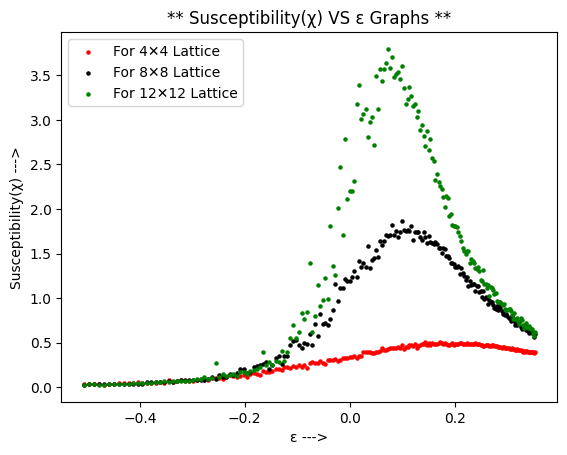

In [ ]:
# Here temperature will be scaled with the help of 'ε' parameter defined previously as (T-Tc)/T
# The reason is to find the maxima at a particular 'ε' value (approximately)

epcylon=[(T-Tc)/T for T in temp]
plt.scatter(epcylon,susceptibility1,s=5,c='red',label='For 4✕4 Lattice')
plt.scatter(epcylon,susceptibility2,s=5,c='black',label='For 8✕8 Lattice')
plt.scatter(epcylon,susceptibility3,s=5,c='green',label='For 12✕12 Lattice')
plt.legend()
plt.xlabel('ε --->')
plt.ylabel("Susceptibility(χ) --->")
plt.title("** Susceptibility(χ) VS ε Graphs **")
plt.show()

**We shall find another critical exponent called γ (gamma).**
We shall draw graph of χL^(-γ/ν) VS εL^(1/ν) where χ is susceptibility, the other parameters are defined previously.

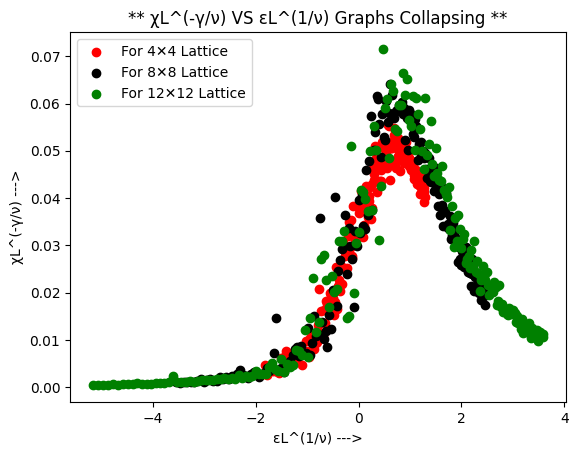

In [ ]:
import math
import matplotlib.pyplot as plt

Tc=2.260000000000007 # Critical temperature
#temp_series=[x for x in temp[50:140]]  # Cutting the temperature window about Tc for better result
epcylon=[(T-Tc)/T for T in temp]
gamma,nu=1.75,1.07
L1,L2,L3=4,8,12
X_coord1=[epcylon[i]*(L1**(1/nu)) for i in range(len(temp))]
X_coord2=[epcylon[i]*(L2**(1/nu)) for i in range(len(temp))]
X_coord3=[epcylon[i]*(L3**(1/nu)) for i in range(len(temp))]

#Order_parameter1=[i for i in order_parameter1[50:140]]
#Order_parameter2=[i for i in order_parameter2[50:140]]
#Order_parameter3=[i for i in order_parameter3[50:140]]
Y_coord1=[i*(4**(-gamma/nu)) for i in susceptibility1]
Y_coord2=[i*(8**(-gamma/nu)) for i in susceptibility2]
Y_coord3=[i*(12**(-gamma/nu)) for i in susceptibility3]

plt.scatter(X_coord1,Y_coord1,c='red',label='For 4✕4 Lattice')
plt.scatter(X_coord2,Y_coord2,c='black',label='For 8✕8 Lattice')
plt.scatter(X_coord3,Y_coord3,c='green',label='For 12✕12 Lattice')
plt.legend()
#plt.ylim(0,0.1)
plt.xlabel('εL^(1/ν) --->')
plt.ylabel("χL^(-γ/ν) --->")
plt.title("** χL^(-γ/ν) VS εL^(1/ν) Graphs Collapsing **")
plt.show()

From the above graph **the value of γ (gamma) is coming as 1.75**. The accepted value for γ (gamma) is 1.75 for 2-D ising model.

In this way using scaling we can find the other critical exponents and verify whether our computational results match with theoretical results.